In [1]:
from Utils.Solver import *
from Utils.Signals import *

In [2]:
# Let's assume we are interested in the following stocks: AAPL, MSFT, TSLA, AMZN, GOOG
#tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG', 'IBM', 'NFLX', 'NVDA', 'AMD', 'INTC']
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG', 'IBM', 'NFLX', 'NVDA', 'AMD', 'INTC', 'TXN', 'QCOM', 'MU', 'ADI', 'HPQ', 'GLW', 'AVGO', 'ADP', 'INTU', 'PFE'] 


# Download historical stock data
data = yf.download(tickers, start='2000-01-01', end='2025-01-01')
# Initialize the portfolio solver with appropriate penalty and max weight threshold
portfolio_solver = Portfolio_Solver(0.8, max_weight_threshold=0.2 )

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  20 of 20 completed


In [3]:
start_date_signal = '2000-01-01'
end_date_signal = '2021-01-01'
date_range_signal = pd.date_range(start=start_date_signal, end=end_date_signal)

start_date_eval = '2019-01-01'
end_date_eval = '2020-01-01'
date_range_eval = pd.date_range(start=start_date_eval, end=end_date_eval)

In [4]:
# Initialize an empty list to store the rows for the first DataFrame
dataset_scores = []

# Step 1: Create the DataFrame with rsi_scores, macd_scores, and sma_scores
for date in date_range_signal:
    #print(f"processing {date}")

    # Step 1a: Calculate the RSI signal scores
    rsi_signal_scores = calculate_rsi_signal(data, tickers, date=date, period=14)
    rsi_scores = np.array([score[1] for score in rsi_signal_scores])

    # Step 1b: Calculate the MACD signal scores
    macd_signal_scores = calculate_macd_signal(data, tickers, date=date)
    macd_scores = np.array([score[1] for score in macd_signal_scores])

    # Step 1c: Calculate the SMA signal scores
    sma_signal_scores = calculate_sma_signal(data, tickers, date=date)
    sma_scores = np.array([score[1] for score in sma_signal_scores])

    rsi_avg = np.mean(rsi_scores)
    macd_avg = np.mean(macd_scores)
    sma_avg = np.mean(sma_scores)

    if np.any(np.isnan(rsi_scores)) or np.any(np.isnan(macd_scores)) or np.any(np.isnan(sma_scores)):
        #print(f"Skipping {date} due to NaN values in the signals.")
        continue  # Skip this date and move to the next one

    # Step 1d: Add the scores to the first dataset
    dataset_scores.append({
        'date': date,
        'rsi_scores': rsi_scores,
        'macd_scores': macd_scores,
        'sma_scores': sma_scores,
        'rsi_avg': rsi_avg,
        'macd_avg': macd_avg,
        'sma_avg': sma_avg
    })


# Convert the first dataset into a DataFrame
df_scores = pd.DataFrame(dataset_scores)
display(df_scores)

,date,rsi_scores,macd_scores,sma_scores,rsi_avg,macd_avg,sma_avg
0,2011-04-12,"[38.309818085265526, 45.97720047181112, 49.262...","[-0.041286187601591126, 0.07719898457621499, 0...","[1.2408268356323244, 0.365371866226198, 0.0155...",46.402097,0.003431,2.480006
1,2011-04-13,"[43.37424850797548, 45.79300238489778, 50.7693...","[-0.03208371562914361, 0.056302642367309114, 2...","[1.2234387350082407, 0.3209983539581316, 0.016...",48.389785,-0.005745,2.453246
2,2011-04-14,"[39.86839711994756, 41.99395835158948, 51.9222...","[-0.031152884354742144, 0.03080897398629283, -...","[1.2041050863265994, 0.2738241100311285, 0.017...",48.587460,-0.008806,2.426521
3,2011-04-15,"[35.71249999099868, 41.11919216703543, 54.3351...","[-0.03778477843850199, 0.011577386464168116, -...","[1.1826032710075385, 0.2310884094238297, 0.019...",48.959172,-0.008776,2.398987
4,2011-04-18,"[41.52270704788072, 36.385083096512, 50.896577...","[-0.03076668179438015, -0.014564796175821515, ...","[1.1610095953941357, 0.18357272148132608, 0.01...",46.173934,-0.018784,2.364460
...,...,...,...,...,...,...,...
2443,2020-12-24,"[67.92096048210261, 61.4140073074956, 62.87192...","[0.6376306756236336, 0.8196503748550448, -1.10...","[20.276957035064697, 16.26273986816406, 64.366...",56.104702,-0.217209,17.039354
2444,2020-12-28,"[73.64743953274687, 64.36471218290811, 63.1416...","[0.8774114678636185, 0.8857985875651484, -1.16...","[20.262904033660888, 16.051129684448256, 64.87...",57.368068,-0.205486,17.001680
2445,2020-12-29,"[68.56497411696462, 62.478911721359275, 63.483...","[0.8423505821210555, 0.8160785605549794, -1.22...","[20.211752777099605, 15.715760879516608, 65.42...",56.378242,-0.194751,16.928630
2446,2020-12-30,"[65.48947132469064, 56.995004416232334, 67.545...","[0.6767038600738022, 0.5607955445956307, -0.71...","[20.215960254669184, 15.50269737243653, 66.166...",56.857873,-0.193543,16.915374


In [5]:
start_date_train = '2018-01-01'
end_date_train = '2019-01-01'
date_range_train = pd.date_range(start=start_date_train, end=end_date_train)

start_date_eval = '2020-01-01'
end_date_eval = '2021-01-01'
date_range_eval = pd.date_range(start=start_date_eval, end=end_date_eval)

# Filter the dataframe within the date range
df_train = df_scores[(df_scores['date'] >= start_date_train) & (df_scores['date'] <= end_date_train)]
display(df_train)
df_eval = df_scores[(df_scores['date'] >= start_date_eval) & (df_scores['date'] <= end_date_eval)]
display(df_eval)

,date,rsi_scores,macd_scores,sma_scores,rsi_avg,macd_avg,sma_avg
1692,2018-01-02,"[52.03595471494082, 59.83741293329262, 48.9947...","[-0.1191094854785566, -0.0818378954324136, -0....","[3.4896539497375443, 9.188496608734127, -0.801...",57.742095,0.033367,5.465428
1693,2018-01-03,"[51.95032193474833, 62.07801717028357, 46.7644...","[-0.09802649617165837, -0.0568710245251387, -0...","[3.529313087463379, 9.231410293579103, -0.8572...",61.618363,0.112901,5.488662
1694,2018-01-04,"[54.11770354877079, 65.96345872485644, 44.9957...","[-0.06944929721560911, -0.000660112853667405, ...","[3.570285491943359, 9.28122159957887, -0.90839...",63.603038,0.184443,5.517775
1695,2018-01-05,"[59.019497105260335, 70.57686093761616, 46.616...","[-0.019969561806263414, 0.09107039337592249, -...","[3.6156815528869615, 9.349190902709964, -0.956...",65.278623,0.250290,5.549686
1696,2018-01-08,"[56.8610117363327, 70.93047848555204, 59.58786...","[0.0007726104312951176, 0.1416291216764366, 0....","[3.661437377929687, 9.42191308975221, -0.96971...",66.155928,0.291734,5.593833
...,...,...,...,...,...,...,...
1938,2018-12-24,"[22.98364053470888, 29.47613317238168, 31.3349...","[-0.27370478857346203, -1.2587354764857435, -0...","[-0.38992462158203267, 3.659547576904302, 1.21...",30.627686,-0.698724,-3.311387
1939,2018-12-26,"[36.49253237606829, 43.11258764285329, 45.4409...","[-0.1458655078353508, -1.018198596917367, -0.4...","[-0.6690876770019472, 3.4754382705688442, 1.31...",42.217576,-0.527613,-3.486970
1940,2018-12-27,"[35.82499732220959, 44.23229023299216, 42.3978...","[-0.05313771154850233, -0.7668444481568557, -0...","[-0.931384239196781, 3.3260177612304744, 1.397...",43.736318,-0.338804,-3.638528
1941,2018-12-28,"[35.924018949183704, 43.069050882914105, 48.95...","[0.029586718657065525, -0.6047803188545653, -0...","[-1.217970237731933, 3.0991595458984307, 1.471...",44.431095,-0.186764,-3.835807


,date,rsi_scores,macd_scores,sma_scores,rsi_avg,macd_avg,sma_avg
2195,2020-01-02,"[84.60765651419253, 76.61366436887022, 75.7266...","[0.33128594021151136, 0.14369281931639133, 0.1...","[11.474996433258056, 13.135984687805177, 5.664...",66.493470,0.130813,2.259627
2196,2020-01-03,"[77.7334067531878, 65.79056224187234, 78.62741...","[0.30404726807909954, 0.04923346875278245, 0.1...","[11.622066040039059, 13.367621879577626, 5.858...",60.737520,0.069607,2.417737
2197,2020-01-06,"[79.20987272381656, 66.82528017449289, 80.3217...","[0.29067284198698395, -0.010599167013884081, 0...","[11.770497760772713, 13.601329269409177, 6.061...",61.160446,0.056226,2.597105
2198,2020-01-07,"[75.98182026140458, 59.92268463299779, 83.2575...","[0.22762390540713828, -0.15887975912976726, 0....","[11.907039012908939, 13.747928771972653, 6.218...",61.599823,0.042750,2.751209
2199,2020-01-08,"[79.10381539668721, 66.39370440934314, 86.1821...","[0.2321743072617859, -0.11322410242327674, 0.3...","[12.043762397766109, 13.918317642211917, 6.360...",63.564471,0.089914,2.902644
...,...,...,...,...,...,...,...
2443,2020-12-24,"[67.92096048210261, 61.4140073074956, 62.87192...","[0.6376306756236336, 0.8196503748550448, -1.10...","[20.276957035064697, 16.26273986816406, 64.366...",56.104702,-0.217209,17.039354
2444,2020-12-28,"[73.64743953274687, 64.36471218290811, 63.1416...","[0.8774114678636185, 0.8857985875651484, -1.16...","[20.262904033660888, 16.051129684448256, 64.87...",57.368068,-0.205486,17.001680
2445,2020-12-29,"[68.56497411696462, 62.478911721359275, 63.483...","[0.8423505821210555, 0.8160785605549794, -1.22...","[20.211752777099605, 15.715760879516608, 65.42...",56.378242,-0.194751,16.928630
2446,2020-12-30,"[65.48947132469064, 56.995004416232334, 67.545...","[0.6767038600738022, 0.5607955445956307, -0.71...","[20.215960254669184, 15.50269737243653, 66.166...",56.857873,-0.193543,16.915374


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

class SignalWeightLearner(nn.Module):
    def __init__(self):
        super(SignalWeightLearner, self).__init__()
        # 3 weights for [RSI, MACD, SMA]
        self.weights = nn.Parameter(torch.ones(3, 1) / 3)

    def forward(self):
        # Clamp weights between 0 and 1, normalize to sum to 1
        clipped_weights = torch.clamp(self.weights, 0, 1)
        normalized_weights = clipped_weights / clipped_weights.sum()
        return normalized_weights

def differentiable_loss(weights, df_train):
    total_scores = []

    for _, row in df_train.iterrows():
        rsi_scores = torch.tensor(row['rsi_scores'], dtype=torch.float32)
        macd_scores = torch.tensor(row['macd_scores'], dtype=torch.float32)
        sma_scores = torch.tensor(row['sma_scores'], dtype=torch.float32)

        signals = torch.stack([rsi_scores, macd_scores, sma_scores], dim=1)  # shape (num_assets, 3)
        combined_scores = signals @ weights  # shape (num_assets, 1)

        # Flatten
        combined_scores = combined_scores.squeeze()

        # Normalize between 0 and 1
        min_val = combined_scores.min()
        max_val = combined_scores.max()
        normalized_scores = (combined_scores - min_val) / (max_val - min_val + 1e-8)  # avoid division by 0

        # Loss idea: maximize the average combined score
        avg_score = normalized_scores.mean()
        total_scores.append(avg_score)

    # Average over all dates
    total_scores = torch.stack(total_scores)
    loss = -total_scores.mean()  # Maximize avg_score → minimize (-avg_score)
    return loss

def train_signal_weight_nn(df_train, epochs=50, lr=0.01):
    model = SignalWeightLearner()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        optimizer.zero_grad()

        weights = model()  # Forward pass → normalized weights
        loss = differentiable_loss(weights, df_train)

        loss.backward()
        optimizer.step()

        with torch.no_grad():
            print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item():.6f} | Weights: {model().view(-1).detach().numpy()}")

    return model


In [7]:
# Only df_train is needed now!
trained_model = train_signal_weight_nn(df_train, epochs=30, lr=0.01)

# Get final learned weights
final_weights = trained_model().view(-1).detach().numpy()
print("Final Learned Weights:", final_weights)

Epoch 1/30 - Loss: -0.362995 | Weights: [0.34680122 0.32659954 0.3265992 ]
Epoch 2/30 - Loss: -0.368793 | Weights: [0.36050406 0.3198156  0.31968036]
Epoch 3/30 - Loss: -0.374725 | Weights: [0.37449867 0.31287205 0.31262922]
Epoch 4/30 - Loss: -0.380707 | Weights: [0.38746557 0.30815852 0.3043759 ]
Epoch 5/30 - Loss: -0.386843 | Weights: [0.39764363 0.30856586 0.2937905 ]
Epoch 6/30 - Loss: -0.392902 | Weights: [0.40646648 0.31122515 0.2823084 ]
Epoch 7/30 - Loss: -0.398889 | Weights: [0.41429695 0.31541148 0.27029154]
Epoch 8/30 - Loss: -0.405171 | Weights: [0.42152235 0.3204254  0.2580523 ]
Epoch 9/30 - Loss: -0.411511 | Weights: [0.42827156 0.32596445 0.245764  ]
Epoch 10/30 - Loss: -0.417549 | Weights: [0.4346892  0.33174822 0.2335626 ]
Epoch 11/30 - Loss: -0.423307 | Weights: [0.44210026 0.3357133  0.22218649]
Epoch 12/30 - Loss: -0.428713 | Weights: [0.45263982 0.33477366 0.21258648]
Epoch 13/30 - Loss: -0.433294 | Weights: [0.46438462 0.33197033 0.20364507]
Epoch 14/30 - Loss: -

In [8]:
avg_annualized_return, total_return_sum = portfolio_solver.CalculateEvalReturns(
    tickers, data, df_eval, final_weights
)


     pcost       dcost       gap    pres   dres
 0: -6.6822e-02 -1.1132e+00  1e+00  0e+00  5e+00
 1: -6.8284e-02 -1.2323e-01  5e-02  7e-17  3e-01
 2: -1.0702e-01 -1.3080e-01  2e-02  3e-17  3e-02
 3: -1.1255e-01 -1.1337e-01  8e-04  2e-16  1e-03
 4: -1.1319e-01 -1.1320e-01  8e-06  2e-16  1e-05
 5: -1.1320e-01 -1.1320e-01  8e-08  2e-16  1e-07
 6: -1.1320e-01 -1.1320e-01  8e-10  3e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.1831e-02 -1.1160e+00  1e+00  0e+00  5e+00
 1: -7.3842e-02 -1.2602e-01  5e-02  4e-17  2e-01
 2: -1.0965e-01 -1.2619e-01  2e-02  2e-16  2e-02
 3: -1.1431e-01 -1.1609e-01  2e-03  2e-16  2e-03
 4: -1.1595e-01 -1.1599e-01  3e-05  2e-16  3e-05
 5: -1.1598e-01 -1.1598e-01  3e-07  3e-16  3e-07
 6: -1.1598e-01 -1.1598e-01  3e-09  3e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.8071e-02 -1.1054e+00  1e+00  2e-16  5e+00
 1: -6.9431e-02 -1.1539e-01  5e-02  3e-17  2e-01
 2: -1.0074e-01 -1.1390e

In [9]:
print(avg_annualized_return, total_return_sum)

7.221794251022902 9.312812448743552


In [10]:
# Initialize weights with small random values or equal weights
signal_weights = np.array([1/3, 1/3, 1/3])  # [w_rsi, w_macd, w_sma]


In [18]:
from dateutil.relativedelta import relativedelta

results = []
years = range(2010, 2018)  # Adjust based on your dataset

for train_year in years:
    train_start_date = pd.Timestamp(f'{train_year}-01-01')
    train_end_date = pd.Timestamp(f'{train_year}-12-31')

    eval_year = train_year + 2
    eval_start_date = pd.Timestamp(f'{eval_year}-01-01')
    eval_end_date = pd.Timestamp(f'{eval_year}-12-31')

    # Slice your data
    df_train = df_scores[(df_scores['date'] >= train_start_date) & (df_scores['date'] <= train_end_date)]
    df_eval = df_scores[(df_scores['date'] >= eval_start_date) & (df_scores['date'] <= eval_end_date)]

    if df_train.empty or df_eval.empty:
        print(f"Skipping {train_year} due to missing data.")
        continue

    print(f"\n📅 Training on {train_year}, Evaluating on {eval_year}")

    # --- Train the model ---
    trained_model = train_signal_weight_nn(df_train, epochs=100, lr=0.01)

    # --- Get the learned weights ---
    optimal_signal_weights = trained_model().view(-1).detach().numpy()

    # --- Evaluate the learned weights on the eval year ---
    avg_annualized_return, total_return_sum = portfolio_solver.CalculateEvalReturns(
        tickers, data, df_eval, optimal_signal_weights
    )

    # --- Baseline: Equal weights [1/3, 1/3, 1/3] ---
    avg_annualized_return_1n, total_return_sum_1n = portfolio_solver.CalculateEvalReturns(
        tickers, data, df_eval, [1, 1, 1]
    )

    results.append({
        'train_year': train_year,
        'eval_year': eval_year,
        'optimal_weights': optimal_signal_weights,
        'optimized_annual_return': avg_annualized_return,
        'optimized_total_return': total_return_sum,
        'uniform_annual_return': avg_annualized_return_1n,
        'uniform_total_return': total_return_sum_1n
    })

# --- Convert results to a nice DataFrame ---
results_df = pd.DataFrame(results)
display(results_df)


Skipping 2010 due to missing data.

📅 Training on 2011, Evaluating on 2013
Epoch 1/100 - Loss: -0.560582 | Weights: [0.32659933 0.3265993  0.3468013 ]
Epoch 2/100 - Loss: -0.560663 | Weights: [0.3335946  0.31742838 0.34897703]
Epoch 3/100 - Loss: -0.560737 | Weights: [0.3391502  0.30776903 0.35308072]
Epoch 4/100 - Loss: -0.560801 | Weights: [0.34379604 0.29786557 0.35833836]
Epoch 5/100 - Loss: -0.560867 | Weights: [0.34780008 0.28784072 0.36435917]
Epoch 6/100 - Loss: -0.560929 | Weights: [0.35276502 0.2777416  0.36949342]
Epoch 7/100 - Loss: -0.560990 | Weights: [0.3593347  0.26786515 0.3728001 ]
Epoch 8/100 - Loss: -0.561052 | Weights: [0.36505154 0.25791407 0.3770344 ]
Epoch 9/100 - Loss: -0.561109 | Weights: [0.3700341  0.24793775 0.38202813]
Epoch 10/100 - Loss: -0.561166 | Weights: [0.374383   0.2379684  0.38764864]
Epoch 11/100 - Loss: -0.561223 | Weights: [0.37931946 0.22804132 0.39263925]
Epoch 12/100 - Loss: -0.561274 | Weights: [0.38552734 0.21827945 0.3961932 ]
Epoch 13/1

,train_year,eval_year,optimal_weights,optimized_annual_return,optimized_total_return,uniform_annual_return,uniform_total_return
0,2011,2013,"[0.50183266, 0.0, 0.49816737]",1.021653,5.941432,1.032782,6.624872
1,2012,2014,"[0.19404209, 0.0, 0.80595785]",0.724777,5.303573,0.600375,1.461208
2,2013,2015,"[0.4583206, 0.0, 0.5416794]",0.343992,-1.990029,0.086695,-5.970288
3,2014,2016,"[0.21859232, 0.0, 0.78140765]",0.738913,7.289578,2.291148,9.196619
4,2015,2017,"[0.34889638, 0.6097761, 0.041327536]",1.264149,8.076039,0.897178,7.217303
5,2016,2018,"[0.1894357, 0.0, 0.8105643]",0.759636,-0.169140,0.746987,-0.641837
6,2017,2019,"[0.63399005, 0.0, 0.3660099]",3.158725,6.935735,4.756387,9.669187



📊 Summary of Rolling Evaluation Results:
[{'eval_year': 2013,
  'optimal_weights': array([0.50183266, 0.        , 0.49816737], dtype=float32),
  'optimized_annual_return': np.float64(1.0216532995778524),
  'optimized_total_return': np.float64(5.9414315335741925),
  'train_year': 2011,
  'uniform_annual_return': np.float64(1.032782274103783),
  'uniform_total_return': np.float64(6.624871756084884)},
 {'eval_year': 2014,
  'optimal_weights': array([0.19404209, 0.        , 0.80595785], dtype=float32),
  'optimized_annual_return': np.float64(0.724777434414977),
  'optimized_total_return': np.float64(5.303573047257052),
  'train_year': 2012,
  'uniform_annual_return': np.float64(0.6003754630194732),
  'uniform_total_return': np.float64(1.4612081265412762)},
 {'eval_year': 2015,
  'optimal_weights': array([0.4583206, 0.       , 0.5416794], dtype=float32),
  'optimized_annual_return': np.float64(0.34399212894756115),
  'optimized_total_return': np.float64(-1.9900290143638064),
  'train_year'

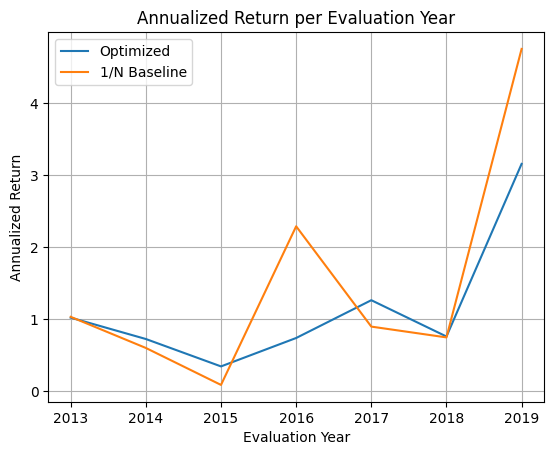

In [19]:
import pprint

print("\n📊 Summary of Rolling Evaluation Results:")
pprint.pprint(results)

# Optional: Plot results over time
years = [r['eval_year'] for r in results]
optimized_returns = [r['optimized_annual_return'] for r in results]
uniform_returns = [r['uniform_annual_return'] for r in results]

plt.plot(years, optimized_returns, label='Optimized')
plt.plot(years, uniform_returns, label='1/N Baseline')
plt.xlabel("Evaluation Year")
plt.ylabel("Annualized Return")
plt.title("Annualized Return per Evaluation Year")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
# Convert results list to DataFrame
df_results = pd.DataFrame(results)

# Clean up columns for readability
df_results['optimal_weights'] = df_results['optimal_weights'].apply(lambda w: np.round(w, 3))

# Reorder and rename columns for clarity
df_results = df_results[[
    'eval_year', 'eval_year',
    'optimized_annual_return', 'optimized_total_return',
    'uniform_annual_return', 'uniform_total_return',
    'optimal_weights'
]]

df_results.columns = [
    'Train Year', 'Eval Year',
    'Optimized Ann. Return', 'Optimized Total Return',
    '1/N Ann. Return', '1/N Total Return',
    'Optimal Weights [RSI, MACD, SMA]'
]

# Display the table
display(df_results)

,Train Year,Eval Year,Optimized Ann. Return,Optimized Total Return,1/N Ann. Return,1/N Total Return,"Optimal Weights [RSI, MACD, SMA]"
0,2013,2013,1.021653,5.941432,1.032782,6.624872,"[0.502, 0.0, 0.498]"
1,2014,2014,0.724777,5.303573,0.600375,1.461208,"[0.194, 0.0, 0.806]"
2,2015,2015,0.343992,-1.990029,0.086695,-5.970288,"[0.458, 0.0, 0.542]"
3,2016,2016,0.738913,7.289578,2.291148,9.196619,"[0.219, 0.0, 0.781]"
4,2017,2017,1.264149,8.076039,0.897178,7.217303,"[0.349, 0.61, 0.041]"
5,2018,2018,0.759636,-0.169140,0.746987,-0.641837,"[0.189, 0.0, 0.811]"
6,2019,2019,3.158725,6.935735,4.756387,9.669187,"[0.634, 0.0, 0.366]"


In [21]:
# Compute difference between optimized and 1/N annual returns
df_results["Δ Ann. Return (Opt - 1/N)"] = df_results["Optimized Ann. Return"] - df_results["1/N Ann. Return"]


In [22]:
# Compute difference between optimized and 1/N total returns
df_results["Δ Total Return (Opt - 1/N)"] = df_results["Optimized Total Return"] - df_results["1/N Total Return"]
df_results["Δ Total Return (Opt - 1/N)"] = df_results["Δ Total Return (Opt - 1/N)"].round(4)


In [23]:
# Calculate sum of differences
sum_ann_return_diff = df_results["Δ Ann. Return (Opt - 1/N)"].sum()
sum_total_return_diff = df_results["Δ Total Return (Opt - 1/N)"].sum()

print(f"Total Δ Annual Return (Optimized - 1/N): {sum_ann_return_diff:.4f}")
print(f"Total Δ Total Return  (Optimized - 1/N): {sum_total_return_diff:.4f}")


Total Δ Annual Return (Optimized - 1/N): -2.3997
Total Δ Total Return  (Optimized - 1/N): 3.8302
